In [1]:
from dsd import DATA_DIR 

DIR = DATA_DIR / "diffusion_renders" / "mugs" / "run_1"

# list all the png files in the subdirs
original_render_paths = list(DIR.glob("**/rgb.png"))

# get the parent directories
render_dirs = [p.parents[1] for p in original_render_paths]


In [2]:
import matplotlib.pyplot as plt
from PIL import Image
def visualize_render(render_dir, idx_start,idx_stop):
    # get subdirs
    subdirs = [d for d in render_dir.iterdir() if d.is_dir()]

    original_subdir = [d for d in subdirs if d.name == "original"][0]
    subdirs = [d for d in subdirs if d.name != "original"]

    # get number of renders in each subdir
    num_renders = min([len(list(d.glob("*.png"))) for d in subdirs])
    num_cols  = max(idx_stop-idx_start, 2)

    # make subplot with (subdir x num_renders) images
    fig, axs = plt.subplots(len(subdirs)+1, num_cols, figsize=(3*num_cols, 4*(len(subdirs)+1)))
    axs[0, 0].imshow(plt.imread(original_subdir / "rgb.png"))
    axs[0, 0].set_title("original")
    axs[0, 0].axis("off")
    for j in range(num_cols - 1):
        axs[0, j+1].axis("off")
    for i, subdir in enumerate(subdirs):
        images = list(subdir.glob("*.png"))
        for j in range(idx_start, idx_stop):
            axs[i+1, j-idx_start].imshow(plt.imread(images[j]))
            axs[i+1, j-idx_start].set_title(f"{subdir.name} \n {images[j].name}", fontsize=6)
            axs[i+1, j-idx_start].axis("off")




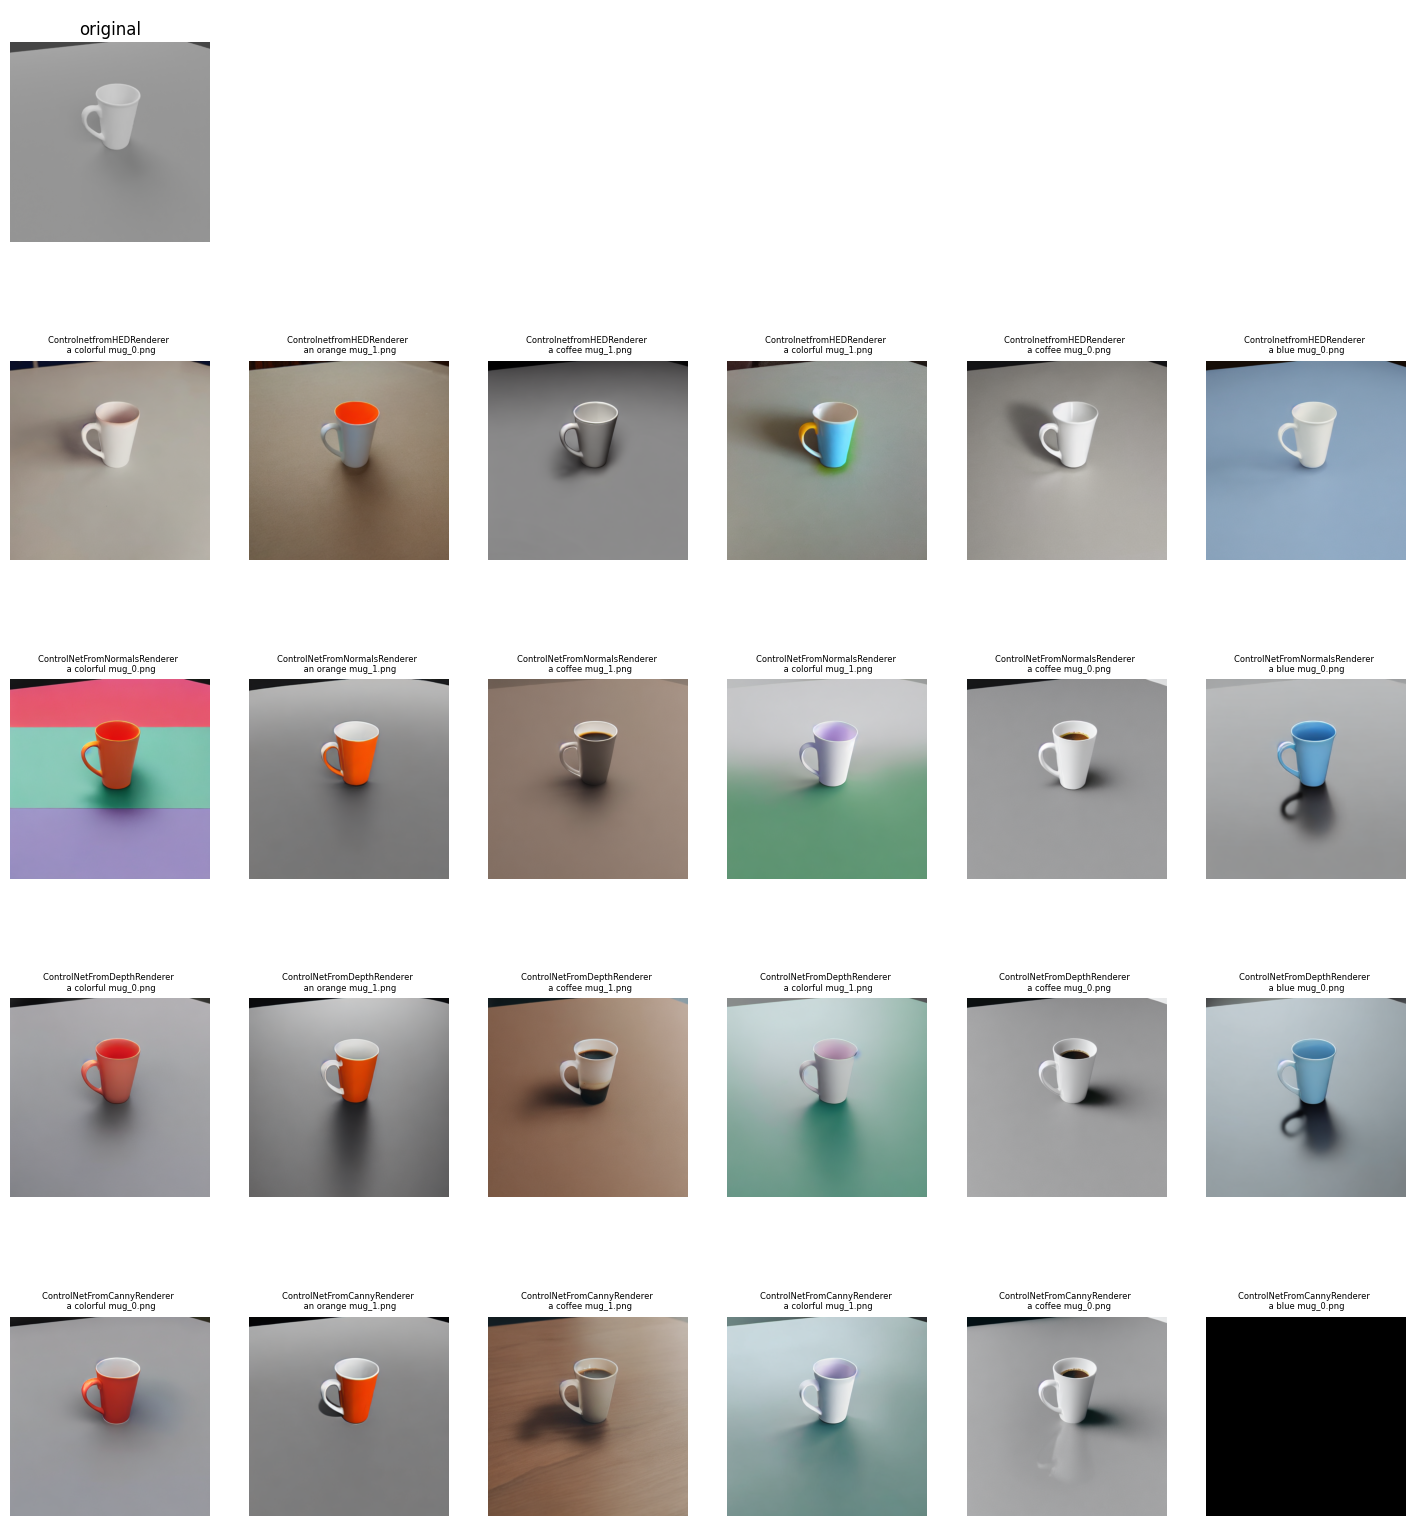

In [3]:
visualize_render(render_dirs[30],30,36)

In [4]:
# create widget to select render
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import os

def f(x):
    visualize_render(render_dirs[x],0,6)
interact(f, x=widgets.IntSlider(min=0, max=len(render_dirs)-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='x', max=99), Output()), _dom_classes=('widget-interact',…

<function __main__.f(x)>